# Neural Nets
### Author: Beixian Gu

## Table of Contents
- Simple Layer Neural Network
- Multiple Layer Neural Network
- Applications on Dataset

## Simple Layer Neural Network (Single-Layer Perceptron):
   ![image.png](https://qph.cf2.quoracdn.net/main-qimg-445078d3983bbe57c93696e6db990a79-lq)
   
A simple neural network, also known as a single-layer perceptron, is the most basic form of a neural network. It consists of a single layer of artificial neurons, or perceptrons, that are connected directly to the input features. Each perceptron computes a weighted sum of its input features and applies an activation function to generate an output. The single-layer perceptron can be used to solve linearly separable problems.

### Mathematical Description
Given an input vector $x$ of dimension $n$ and a weight vector $w$ of the same dimension, the output $y$ of the single-layer perceptron is computed as follows:

Compute the weighted sum: 
$$z = w_1 * x_1 + w_2 * x_2 + ... + w_n * x_n$$

Apply the activation function $f$: 
$$y = f(z)$$

Common activation functions include the step function, sigmoid function, and ReLU (rectified linear unit) function.


## Multiple Layer Neural Network:
A multi-layer neural network, also known as a deep neural network, consists of multiple layers of artificial neurons. These layers are organized in a hierarchical fashion, with the input layer connected to one or more hidden layers, which are in turn connected to the output layer. Each neuron in a hidden layer computes a weighted sum of the outputs from the previous layer and applies an activation function. The additional hidden layers enable the network to learn more complex, non-linear patterns in the data.

![multiple](https://miro.medium.com/v2/resize:fit:1400/1*_M4bZyuwaGby6KMiYVYXvg.jpeg)
    
### Mathematical Description
Given an input vector $x$ and a network with $L$ layers, the output $y$ of the multi-layer neural network is computed as follows:

Initialize the input for the first layer: 
$$a^0 = x$$

For each layer $l = 1, 2, ..., L$, compute the weighted $\sum z^l$ and the activation $a^l$:
$$z^l = W^l * a^{(l-1)} + b^l$$
$$a^l = f(z^l)$$
where $W^l$ is the weight matrix for layer $l$, $b^l$ is the bias vector for layer $l$, and $f$ is the activation function.
The output $y$ is the activation of the last layer: 
$$y = a^L$$

Common activation functions for hidden layers include the sigmoid function, tanh (hyperbolic tangent) function, and ReLU function. For the output layer, the activation function depends on the task, e.g., softmax for classification or identity for regression.

## Application on Iris dataset

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- Perceptron

In [4]:
perceptron = Perceptron(max_iter=1000, tol=1e-3)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [10]:
def plot_decision_boundary(X, y, classifier, test_idx=None, resolution=0.02, title='Classifier'):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

/var/folders/5t/m39g46l54l75_5fkhvww25tr0000gn/T/ipykernel_74214/4053779374.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


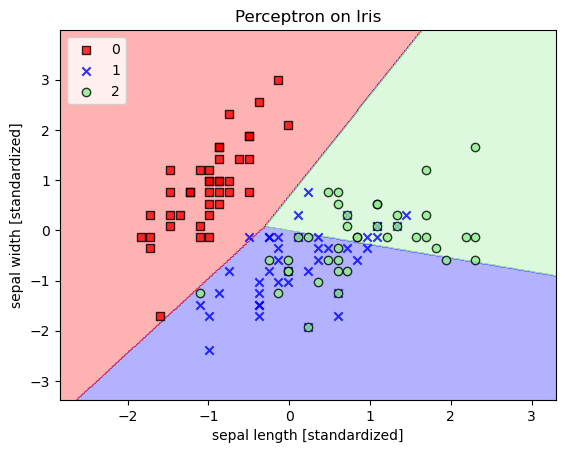

In [11]:
perceptron.fit(X_train[:, :2], y_train)
plot_decision_boundary(X_train[:, :2], y_train, classifier=perceptron)
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.title('Perceptron on Iris')
plt.show()

- Multi-layer Perceptron

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/var/folders/5t/m39g46l54l75_5fkhvww25tr0000gn/T/ipykernel_74214/4053779374.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


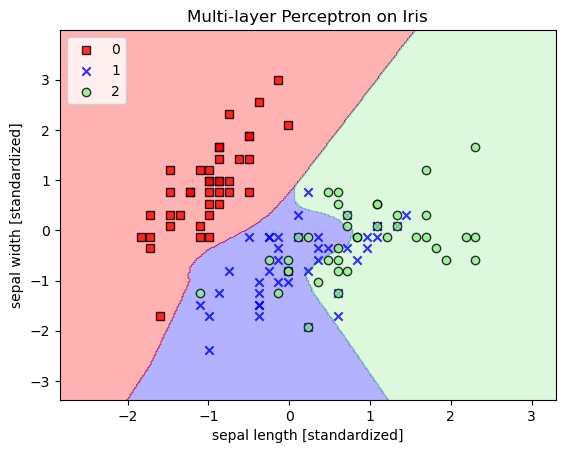

In [12]:
mlp.fit(X_train[:, :2], y_train)
plot_decision_boundary(X_train[:, :2], y_train, classifier=mlp)
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.title('Multi-layer Perceptron on Iris')
plt.show()
